In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/titanic/train.csv')
print(titanic_df.head(3))
print(titanic_df.info())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), ob

In [ ]:
# Age, Cabin, Embarked의 null 값에 대한 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터의 null 값 개수: ',titanic_df.isnull().sum())

데이터의 null 값 개수:  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
# 피처 문자열 확인
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포:\n', titanic_df['Embarked'].value_counts())
print('-'*50)
# Cabin의 경우 첫번째 알파벳이 중요한데,
# 이는 선실의 등급을 의미하며 부자와 가난한 사람간의 차별이 심했기 때문
titanic_df['Cabin'] = titanic_df['Cabin'].str[0] # 따라서 앞글자만 추출함
print(titanic_df['Cabin'].head(5))

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64
--------------------------------------------------
0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


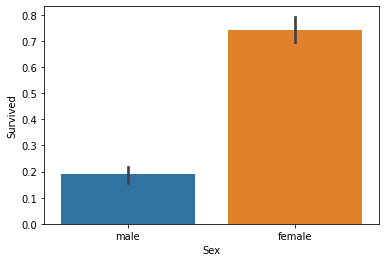

In [ ]:
# 머신러닝 알고리즘을 적용시키기 전에 데이터 분석
# 1. 성별이 생존에 미치는 영향 (0: 사망, 1: 생존)
print(titanic_df.groupby(['Sex','Survived'])['Survived'].count())

sns.barplot(data = titanic_df, x='Sex', y='Survived')
plt.show()

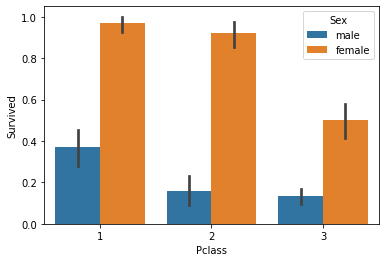

In [ ]:
# 2. 성별과 부(객실 등급)가 생존에 미치는 영향 (0: 사망, 1: 생존)
sns.barplot(data= titanic_df, x='Pclass', y='Survived', hue='Sex')

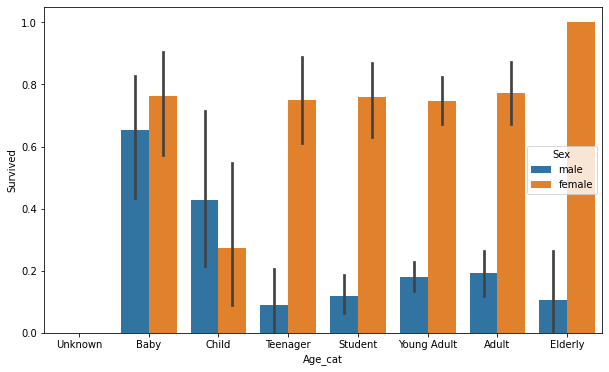

In [ ]:
# 3. 연령 및 성별에 따른 생존 확률
def get_category(age):
    cat=''
    if age<=-1 : cat = 'Unknown'
    elif age<=5 : cat = 'Baby'
    elif age <=12 : cat = 'Child'
    elif age <=18 : cat = 'Teenager'
    elif age <=25 : cat = 'Student'
    elif age <=35 : cat = 'Young Adult'
    elif age <=60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat 

plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda를 통해 'Age' 칼럼에 해당하는 값을 인자로 받아, 해당하는 cat을 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

sns.barplot(data=titanic_df, x='Age_cat', y='Survived',hue='Sex',order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [ ]:
# 문자열 카테고리 피처에 대해 숫자형 카테고리로 변환
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        # titanic_df의 문자열이 포함된 열에 대해서 레이블 인코딩 실행
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
# titanic_df.drop(['Name','Ticket'],axis=1,inplace=True)

# Cabin, Sex, Embarked에 대해 레이블 인코딩 완료
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,7,3
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,7,3
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,7,3


In [ ]:
# titanic에서 사용된 데이터 전처리 함수 

# Null처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에서 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
# 원본 데이터 재로딩
# 피처 데이터 세트와 레이블 데이터 세트 추출
# 즉, Survived만 분류하여 레이블 데이터 및 피처 데이터 세트 생성
titanic_df = pd.read_csv('/content/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

# 피처 데이터에 대한 전처리
X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 Classfier 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds =5):
    # 폴드 세트를 5개인 KFold 객체 생성
    # 폴드 수 만큼 예측 결과를 저장하기 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # train_index, test_index는 각각 학습 및 검증 데이터에 해당하는 인덱스를 ndarray 형태로 반환함
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


In [ ]:
# cross_val_score()을 이용한 교차 검증 -> StratifiedKFold 활용함
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

print("평균 정확도:{0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도:0.7879


In [ ]:
# GridSearchCV를 통해 최적 하이퍼 파라미터를 찾고 예측
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid= parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f} '.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가
dpredictions = best_dclf.predict(X_test)
accuarcy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992 
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8427
